<a href="https://colab.research.google.com/github/chosangwoong/AI-sysetem/blob/main/wine_data_%2Cknn_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
red_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';')
white_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine['color'] = 1
white_wine['color'] = 0
wine = pd.concat([red_wine, white_wine])

In [5]:
x = wine[red_wine.columns.difference(['quality'])]
y = wine['quality']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1234)

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
knn = KNeighborsRegressor(n_neighbors=5)

In [10]:
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [11]:
y_knn = knn.predict(x_test)

In [12]:
%matplotlib inline

In [13]:
import seaborn as sns

In [14]:
sns.set_style('darkgrid')

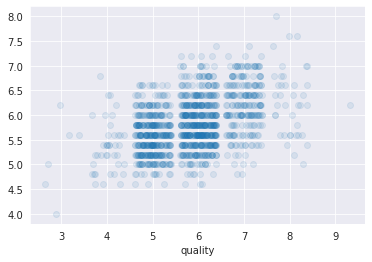

In [15]:
sns.regplot(x=y_test, y=y_knn, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
mean_squared_error(y_test, y_knn)

0.6426769230769231

In [18]:
r2_score(y_test, y_knn)

0.1617311439983018

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
stand = StandardScaler()

In [21]:
x_train_std = stand.fit_transform(x_train)
x_test_std = stand.transform(x_test)

In [22]:
knn2 = KNeighborsRegressor(n_neighbors=5)

In [23]:
knn2.fit(x_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
y_knn2 = knn2.predict(x_test_std)

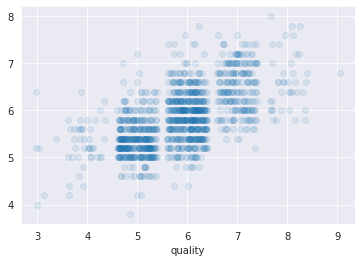

In [25]:
sns.regplot(x=y_test, y=y_knn2, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [26]:
r2_score(y_test, y_knn2)

0.3781310899724081

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

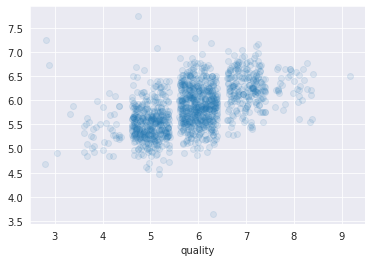

In [28]:
y_lm = lm.predict(x_test)
sns.regplot(x=y_test, y=y_lm, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})

In [29]:
r2_score(y_test, y_lm)

0.2943666891047575

In [30]:
lm2 = LinearRegression()
lm2.fit(x_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_lm2 = lm2.predict(x_test_std)
r2_score(y_test, y_lm2)

0.29436668910476005

In [32]:
xc = wine[red_wine.columns.difference(['color'])]
yc = wine['color']

In [33]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=.2, random_state=1234)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(xc_train, yc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_knc = knc.predict(xc_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yc_test, y_knc)

array([[935,  30],
       [ 43, 292]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(yc_test, y_knc)

0.9438461538461539

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xc_train, yc_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_lr = lr.predict(xc_test)
confusion_matrix(yc_test, y_lr)

array([[954,  11],
       [ 14, 321]])

In [40]:
accuracy_score(yc_test, y_lr)

0.9807692307692307